# 1.0 - Basic framework
This tutorial is meant to introduce the very basic functionality of the comfit Python package. 

The class underlying everything is the class called "BaseSystem". Every other model (classes located in the ./models/ folder) are subclasses of BaseSystem. 

Let's start by importing the package

In [1]:
import comfit as cf

Now we can define a system with a given dimension and resolution

In [2]:
sys1 = cf.BaseSystem(1,xRes=11)

sys1 now contains a number of useful parameters and functions, lets print some of them.

In [3]:
print(sys1.x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
print(sys1.dx, sys1.dt)

1.0 0.1


Even though the system is one-dimensional in this case, it still contains some dummy variables related to y and z. 

In [5]:
print(sys1.y,sys1.dy,sys1.z,sys1.dz)

[0.] 1.0 [0.] 1.0


Of particular interest, perhaps, is the length scale parameter $a_0$

In [6]:
print(sys1.a0)

1


Now, we can try to do some basic calculating and plotting

In [7]:
import numpy as np

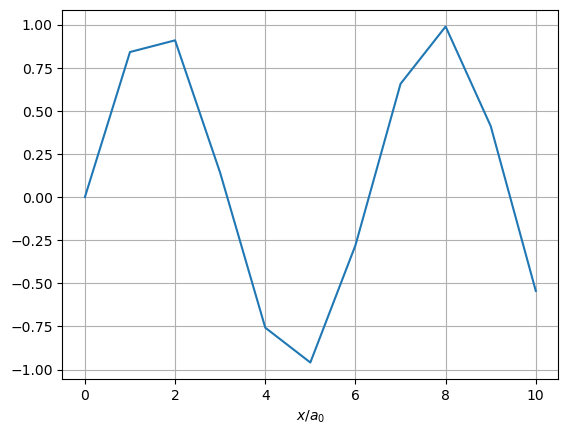

In [8]:
y = np.sin(sys1.x)
sys1.plot_field(y)

By changing the length scale to $2\pi$, we get something that clearly shows the periodicity. 

In [9]:
sys1.a0 = 2* np.pi

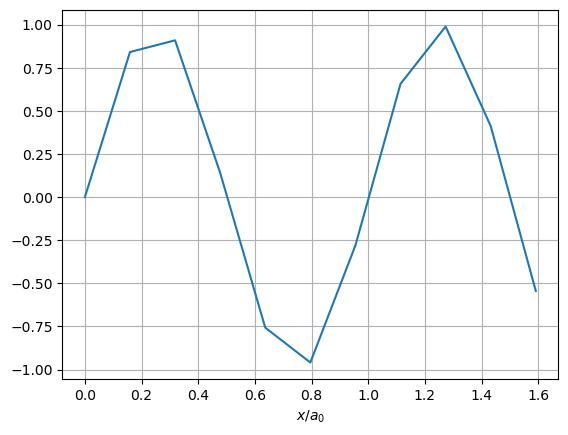

In [10]:
sys1.plot_field(y)

The function looks quite jagged, which we can fix by increasing the resolution and decreasing the interspacing dx

In [11]:
sys2 = cf.BaseSystem(1,xRes=101,dx=0.1)

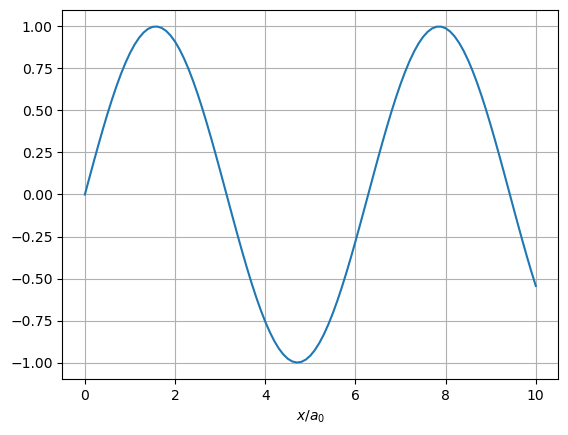

In [12]:
y2 = np.sin(sys2.x)
sys2.plot_field(y2)

Lets have a look at a 2D system and plot a 2D function

<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

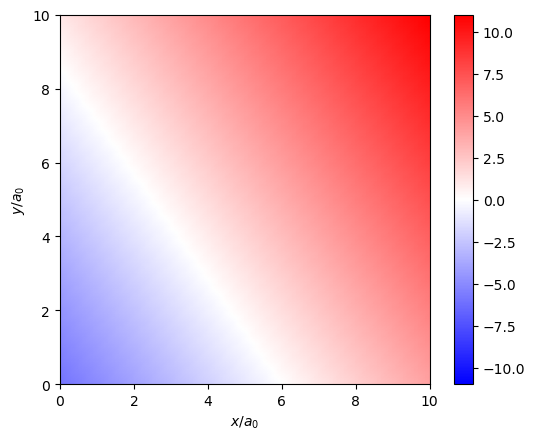

In [13]:
sys2 = cf.BaseSystem(2,xRes=101,dx=0.1,yRes=101,dy=0.1)
field = sys2.x-1 + 0.7*sys2.y-5
sys2.plot_field(field)

Now, the very attentive python reader will have noticed something strange about the previous cell. Namely how is it possible that by adding two 1D arrays $x$ and $y$ do we produce a 2D array. The key lies in the way that these are stored. Let's look at them.

In [14]:
print("x:\n",sys2.x)

x:
 [[ 0. ]
 [ 0.1]
 [ 0.2]
 [ 0.3]
 [ 0.4]
 [ 0.5]
 [ 0.6]
 [ 0.7]
 [ 0.8]
 [ 0.9]
 [ 1. ]
 [ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.4]
 [ 1.5]
 [ 1.6]
 [ 1.7]
 [ 1.8]
 [ 1.9]
 [ 2. ]
 [ 2.1]
 [ 2.2]
 [ 2.3]
 [ 2.4]
 [ 2.5]
 [ 2.6]
 [ 2.7]
 [ 2.8]
 [ 2.9]
 [ 3. ]
 [ 3.1]
 [ 3.2]
 [ 3.3]
 [ 3.4]
 [ 3.5]
 [ 3.6]
 [ 3.7]
 [ 3.8]
 [ 3.9]
 [ 4. ]
 [ 4.1]
 [ 4.2]
 [ 4.3]
 [ 4.4]
 [ 4.5]
 [ 4.6]
 [ 4.7]
 [ 4.8]
 [ 4.9]
 [ 5. ]
 [ 5.1]
 [ 5.2]
 [ 5.3]
 [ 5.4]
 [ 5.5]
 [ 5.6]
 [ 5.7]
 [ 5.8]
 [ 5.9]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.3]
 [ 6.4]
 [ 6.5]
 [ 6.6]
 [ 6.7]
 [ 6.8]
 [ 6.9]
 [ 7. ]
 [ 7.1]
 [ 7.2]
 [ 7.3]
 [ 7.4]
 [ 7.5]
 [ 7.6]
 [ 7.7]
 [ 7.8]
 [ 7.9]
 [ 8. ]
 [ 8.1]
 [ 8.2]
 [ 8.3]
 [ 8.4]
 [ 8.5]
 [ 8.6]
 [ 8.7]
 [ 8.8]
 [ 8.9]
 [ 9. ]
 [ 9.1]
 [ 9.2]
 [ 9.3]
 [ 9.4]
 [ 9.5]
 [ 9.6]
 [ 9.7]
 [ 9.8]
 [ 9.9]
 [10. ]]


In [15]:
print("y:\n",sys2.y)

y:
 [[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
   1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
   2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
   4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
   5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
   7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
   8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
   9.8  9.9 10. ]]


As you see, the x-array is stored as a $(xRes,1)$ array, while the y-array is stored as $(1,yRes)$. When doing calculations with arrays in this way, it is not necessary to create a meshgrid to produce a 2D matrix. 

## Exercise 1
Plot the function 
$$
f(x,y) = \sin(x+y)
$$

## Exercise 2
Plot the function 
$$
f(x,y,z) = exp(-(x^2 + y^2 + z^2))
$$

### Solution

<Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>

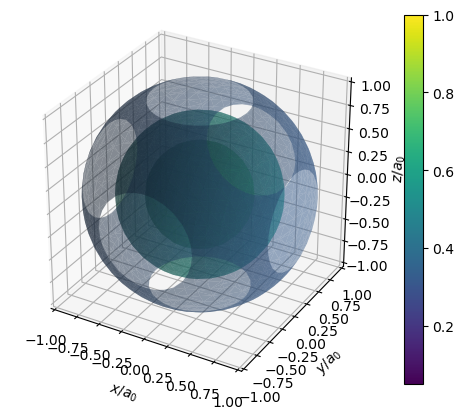

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

sys3 = cf.BaseSystem(3,
                     xRes=21,dx=0.1, xmin=-1,
                     yRes=21,dy=0.1, ymin=-1,
                     zRes=21,dz=0.1, zmin=-1)
f = np.exp(-sys3.x**2 - sys3.y**2 - sys3.z**2)
sys3.plot_field(f,number_of_layers=3)